In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM,  Dropout
%matplotlib inline
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from plot_keras_history import plot_history

Using TensorFlow backend.
C:\home\anaconda\envs\TF\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("covid19_pref_20200421.csv")
data

,Unnamed: 0,date,神奈川県,東京都,愛知県,奈良県,北海道,大阪府,不明,千葉県,...,福井県,関西国際空港,岡山県,青森県,鹿児島県,富山県,山形県,島根県,鳥取県,岩手県
0,0,01/15/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,01/16/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,01/17/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,01/18/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,01/19/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,286,10/27/2020,0.0,158.0,0.0,0.0,0.0,143.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,287,10/28/2020,0.0,171.0,0.0,0.0,0.0,117.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288,288,10/29/2020,0.0,220.0,0.0,0.0,0.0,125.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,289,10/30/2020,0.0,205.0,0.0,0.0,0.0,137.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data2 = pd.read_csv("covid19_pref_accum_20200421.csv")
data2

,Unnamed: 0,date,神奈川県,東京都,愛知県,奈良県,北海道,大阪府,不明,千葉県,...,福井県,関西国際空港,岡山県,青森県,鹿児島県,富山県,山形県,島根県,鳥取県,岩手県
0,0,01/15/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,01/16/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,01/17/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,01/18/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,01/19/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,286,10/27/2020,7283.0,30329.0,5732.0,626.0,2669.0,12271.0,19.0,4722.0,...,256.0,21.0,198.0,149.0,463.0,422.0,84.0,141.0,36.0,27.0
287,287,10/28/2020,7283.0,30500.0,5732.0,626.0,2669.0,12388.0,19.0,4722.0,...,256.0,21.0,198.0,149.0,463.0,422.0,84.0,141.0,36.0,27.0
288,288,10/29/2020,7283.0,30720.0,5732.0,626.0,2669.0,12513.0,19.0,4722.0,...,256.0,21.0,198.0,149.0,463.0,422.0,84.0,141.0,36.0,27.0
289,289,10/30/2020,7283.0,30925.0,5732.0,626.0,2669.0,12650.0,19.0,4722.0,...,256.0,21.0,198.0,149.0,463.0,422.0,84.0,141.0,36.0,27.0


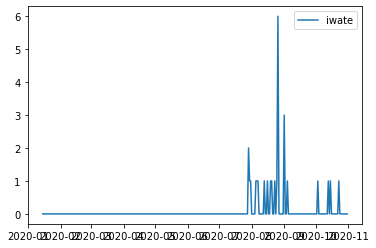

In [4]:
iwate = data['岩手県']
dateTimeIndex = pd.DatetimeIndex(data['date'])
iwate.index = dateTimeIndex
plt.plot(iwate, label = 'iwate')
plt.legend(loc='best')
plt.show()

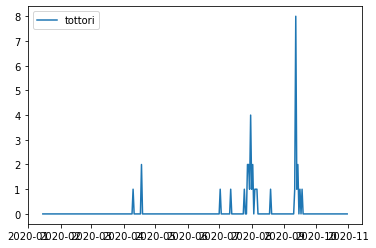

In [5]:
tottori = data['鳥取県']
dateTimeIndex = pd.DatetimeIndex(data['date'])
tottori.index = dateTimeIndex
plt.plot(tottori, label = 'tottori')
plt.legend(loc='best')
plt.show()

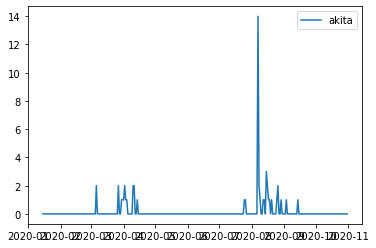

In [6]:
akita = data['秋田県']
dateTimeIndex = pd.DatetimeIndex(data['date'])
akita.index = dateTimeIndex
plt.plot(akita, label = 'akita')
plt.legend(loc='best')
plt.show()

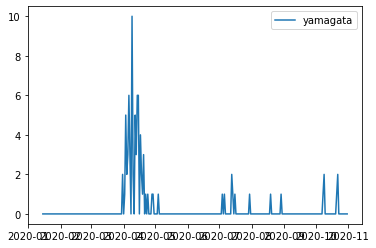

In [7]:
yamagata = data['山形県']
dateTimeIndex = pd.DatetimeIndex(data['date'])
yamagata.index = dateTimeIndex
plt.plot(yamagata, label = 'yamagata')
plt.legend(loc='best')
plt.show()

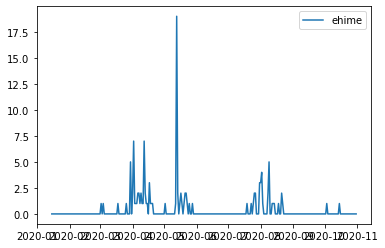

In [8]:
ehime = data['愛媛県']
dateTimeIndex = pd.DatetimeIndex(data['date'])
ehime.index = dateTimeIndex
plt.plot(ehime, label = 'ehime')
plt.legend(loc='best')
plt.show()

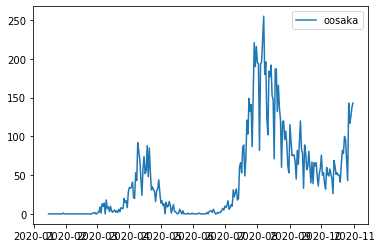

In [9]:
oosaka = data['大阪府']
dateTimeIndex = pd.DatetimeIndex(data['date'])
oosaka.index = dateTimeIndex
plt.plot(oosaka, label = 'oosaka')
plt.legend(loc='best')
plt.show()

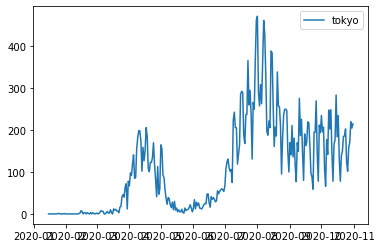

In [10]:
tokyo = data['東京都']
dateTimeIndex = pd.DatetimeIndex(data['date'])
tokyo.index = dateTimeIndex
plt.plot(tokyo, label = 'tokyo')
plt.legend(loc='best')
plt.show()

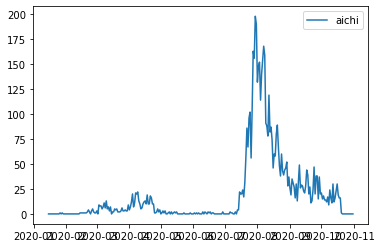

In [11]:
aichi = data['愛知県']
dateTimeIndex = pd.DatetimeIndex(data['date'])
aichi.index = dateTimeIndex
plt.plot(aichi, label = 'aichi')
plt.legend(loc='best')
plt.show()

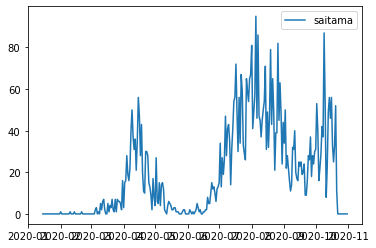

In [12]:
saitama = data['埼玉県']
dateTimeIndex = pd.DatetimeIndex(data['date'])
saitama.index = dateTimeIndex
plt.plot(saitama, label = 'saitama')
plt.legend(loc='best')
plt.show()

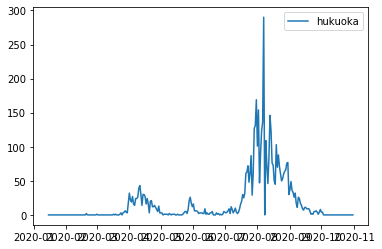

In [13]:
hukuoka = data['福岡県']
dateTimeIndex = pd.DatetimeIndex(data['date'])
hukuoka.index = dateTimeIndex
plt.plot(hukuoka, label = 'hukuoka')
plt.legend(loc='best')
plt.show()

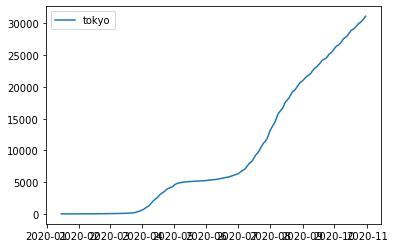

In [14]:
tokyo2 = data2['東京都']
dateTimeIndex = pd.DatetimeIndex(data2['date'])
tokyo2.index = dateTimeIndex
plt.plot(tokyo2, label = 'tokyo')
plt.legend(loc='best')
plt.show()